# Guia 4

## Ejercicio 5

La figura 1 representa la magnitud de la FFT de una señal senoidal de 27 Hz, muestreada durante 1 s, y a una frecuencia de meustreo de 50 Hz. La señal meustreada responde a la ecuación $x(t) = 2sin(2\pi 27t)$.

1- Determine la frecencia de la señal que observa. Explique la discrepancia con frecuencia de la señal original.

2- Deduzca la ecuación para determinar cómo se genera la señal de la frecuencia observada, a partir de la frecuencia original y los parámetros del muestreo. Verifique la validez de su ecuación para otras señales, por ejemplo una de 105 Hz.

3- Determine la relación entre la magnitud observada de la transformada y la amplitud de la señal original.

![Figura 1](../rsc/fig4-5-1.png)

### 5-1

La frecuencia de la señal original ($x(t) = 2sin(2\pi 27t)$) es de 27 Hz. Si graficamos el espectro de frecuencias de la señal muestreada con respecto a las frecuencias (ver grafico siguiente) vemos que las frecuencias detectadas son de 23 Hz y -23 Hz, lo cual no coincide con la frecuencia de 27 de la señal original. Esto se debe al fenómeno de _aliasing_.

<StemContainer object of 3 artists>

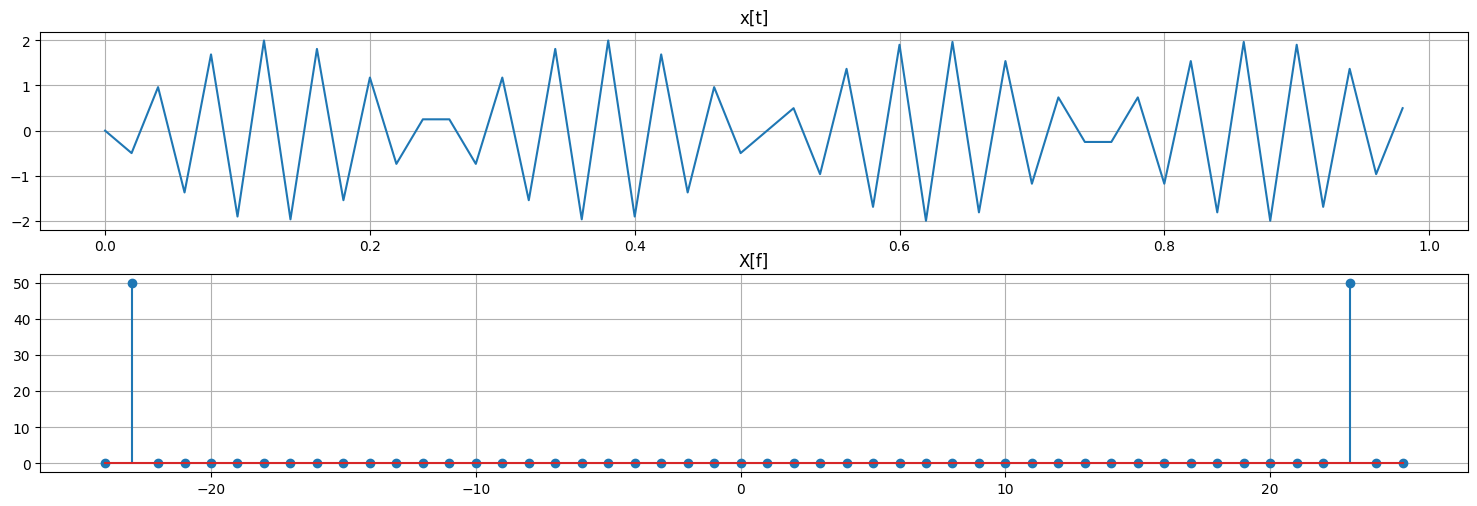

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fourier(x):
    N = len(x)
    coefs = np.zeros(N, dtype=complex)  # vector de coeficientes
    aux1 = -2.0*np.pi/N                 # precalculamos valores que se repiten
    for k in range(N):
        aux2 = aux1*k                   # precalculamos (otros) valores que se repiten
        for n in range(N):
            coefs[k] += x[n]*np.exp(1j*aux2*n)
    return coefs

# Parametros
Tini = 0
Tfin = 1
fm = 50
fs = 27

# Generar senial
t = np.linspace(Tini,Tfin,int(fm*(Tfin-Tini)), endpoint=False)
x = 2*np.sin(2*np.pi*fs*t)

# Calcular DFT
N = len(t)
f = np.linspace(0,fm,N, endpoint=False)     # dominio de frecuencias
for k in range(int(N/2)+1,N):
    f[k] = f[k]-fm
X = fourier(x)

# Graficar
fig, ax = plt.subplots(2)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.tight_layout()
ax[0].grid()
ax[0].set_title('x[t]')
ax[1].grid()
ax[1].set_title('X[f]')

ax[0].plot(t,x)
ax[1].stem(f,np.abs(X))

### 5-2

Para generalizar el problema, la ecuación para determinar la frecuencia observada a partir de la frecuencia de la señal origin al y la frecuencia de muestreo es
$$
f_{observada} = f_m - f_s
$$
Podemos ver que para una señal de 105 Hz con frecuencia de muestreo de 50 Hz tendremos una frecuencia observada de 5 Hz

<StemContainer object of 3 artists>

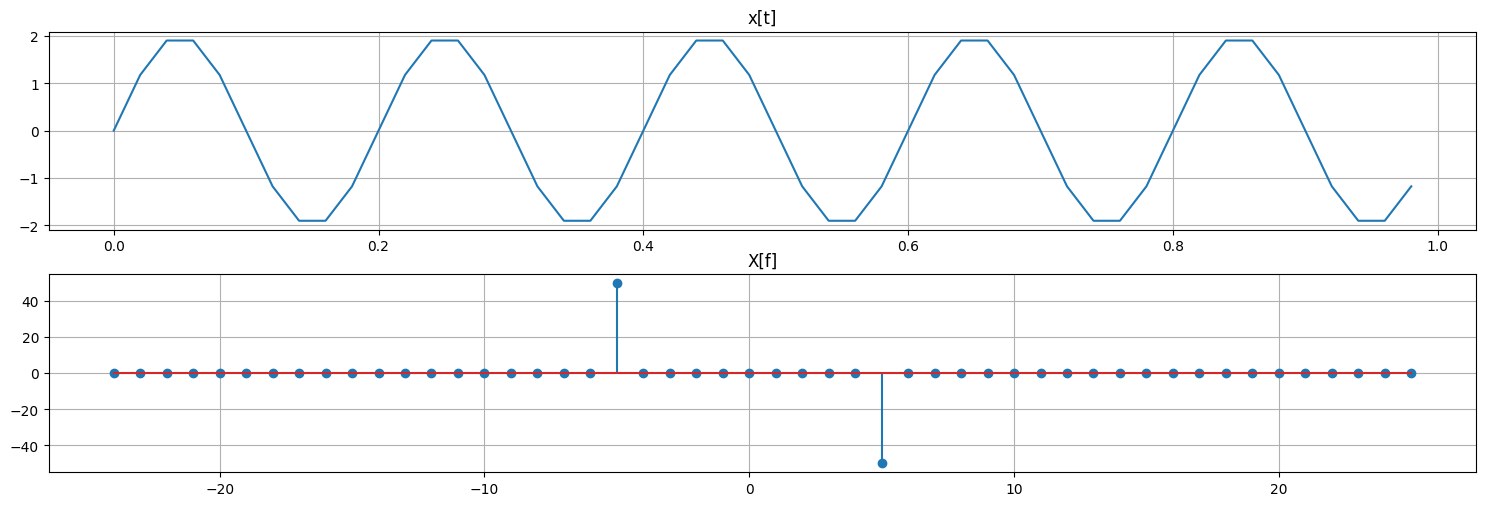

In [2]:
# Generar senial
fs = 105
t = np.linspace(Tini,Tfin,int(fm*(Tfin-Tini)), endpoint=False)
x = 2*np.sin(2*np.pi*fs*t)

# Calcular DFT
N = len(t)
f = np.linspace(0,fm,N, endpoint=False)     # dominio de frecuencias
for k in range(int(N/2)+1,N):
    f[k] = f[k]-fm
X = fourier(x)

# Graficar
fig, ax = plt.subplots(2)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.tight_layout()
ax[0].grid()
ax[0].set_title('x[t]')
ax[1].grid()
ax[1].set_title('X[f]')

ax[0].plot(t,x)
ax[1].stem(f,np.imag(X))

### 5-3

Para una señal de frecuencia $f$ y amplitud $A$ muestreada con $N$ muestras
$$x[n] = A sin\left( \frac{2\pi fn}{N} \right)$$
recordemos que $sin\theta = (e^{j\theta}-e^{-j\theta})/2j$ por lo que podemos escribir $x[n]$ como
$$x[n] = \frac{A}{2j} sin\left( e^{j2\pi fn/N} - e^{-j2\pi fn/N} \right)$$
y su DFT será
$$
\begin{align*}
    X[k] &= \frac{A}{2j} \sum_{n=0}^{N-1}\left[ \left( e^{j2\pi fn/N} - e^{-j2\pi fn/N} \right) e^{-j2\pi kn/N} \right]\\
    &= \frac{A}{2j} \left( \sum_{n=0}^{N-1} e^{j2\pi fn/N}e^{-j2\pi kn/N} - \sum_{n=0}^{N-1} e^{-j2\pi fn/N}e^{-j2\pi kn/N} \right)\\
    &= \frac{A}{2j} \left( \sum_{n=0}^{N-1} e^{j2\pi (f-k)n/N} - \sum_{n=0}^{N-1} e^{-j2\pi (f+k)n/N} \right)\\
    X[k] &=
    \begin{cases}
        \frac{A}{2j}(N-0), &\quad \text{si k=f o k=N-f}\\
        0, &\quad \text{en otro caso}
    \end{cases}
\end{align*}
$$
por lo que
$$x[f]=\frac{AN}{2j}$$
donde la magnitud de la transformada será
$$M = |X[f_0]| = \frac{AN}{2}$$